In [38]:
from matplotlib import pyplot as plt

from genolearn.dataloader import DataLoader
from genolearn.metrics import intra_accuracy

import numpy as np

dataloader = DataLoader('data', 'raw-data/meta-data.csv', 'Accession', 'Region', 'Year')

train, test = dataloader.load_train_test_identifiers(range(2014, 2019), [2019])
Y_train     = dataloader.load_Y(*train)
Y_test      = dataloader.load_Y(*test)


regions    = list(dataloader.encoder)


colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

import os

In [36]:
rf = {}
lr = {}

path = 'O157-region'

for year in os.listdir(path):
    for d, m in zip([rf, lr], ['rf', 'lr']):
        d[year] = {}
        npz      = np.load(os.path.join(path, year, m, 'results.npz'))
        for key, val in npz.items():
            d[year][key] = val


accs = {}


for year in d:
    _, identifiers = dataloader.load_train_test_identifiers(range(int(year), 2019), [2019], min_count = 15)
    Y_test = dataloader.load_Y(*identifiers)
    accs[year] = {}
    for d, m in zip([rf, lr], ['rf', 'lr']):
        accs[year][m] = intra_accuracy(Y_test, dataloader.decode(d[year]['hats']), dataloader.encoder)

In [18]:
from genolearn.models.classification import LogisticRegression

hasattr(LogisticRegression, 'predict_log_proba')

True

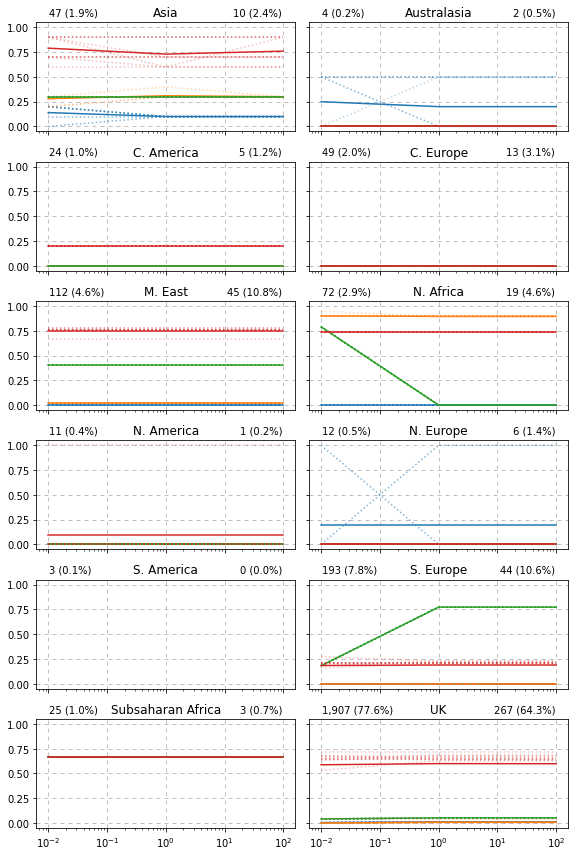

In [2]:
accs    = intra_accuracy(Y_test, Y_hat, regions)

fig, ax = plt.subplots(6, 2, sharex = True, sharey = True, figsize = (8, 12))

ax      = ax.flatten()

for i, acc in enumerate(accs):
    for j, k in enumerate(npz['K']):
        ax[i].semilogx(npz['C'], acc[j], c = colors[j], ls = ':', alpha = 0.3)
        ax[i].semilogx(npz['C'], acc[j].mean(axis = -1), c = colors[j])
    ax[i].set_title(regions[i])
    train = Y_train == regions[i]
    test  = Y_test  == regions[i]
    ax[i].annotate(f'{train.sum():,d} ({train.mean():.1%})', (0.05, 1.06), xycoords = 'axes fraction', ha = 'left')
    ax[i].annotate(f'{test .sum():,d} ({test .mean():.1%})', (0.95, 1.06), xycoords = 'axes fraction', ha = 'right')
    ax[i].grid(ls = (0, (5, 5)))

plt.tight_layout()
# plt.savefig('outputs/intra-accuracies.png', dpi = 300)

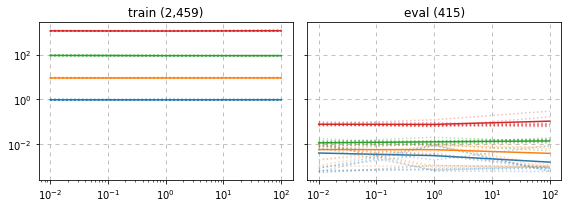

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), sharey = True)

for t, title in enumerate([f'train ({len(Y_train):,d})', f'eval ({len(Y_test):,d})']):
    for j, k in enumerate(npz['K']):
        ax[t].loglog(npz['C'], npz['times'][j,...,t], c = colors[j], ls = ':', alpha = 0.3)
        ax[t].loglog(npz['C'], npz['times'][j,...,t].mean(axis = -1), c = colors[j])
    ax[t].grid(ls = (0, (5, 5)))
    ax[t].set_title(title)

plt.tight_layout()
# plt.savefig('outputs/times.png', dpi = 300)